<a href="https://colab.research.google.com/github/Radhin-Krishna-R/RBI-Reserve-Money--Times-Series-Analysis/blob/main/RBI_Reserve_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker

In [31]:
df=pd.read_excel('/content/Reserve Money_ Components and Sources.xlsx')
df.head()

,Components and Sources,Reserve Money (1.1 + 1.2 + 1.3 = 2.1 + 2.2 + 2.3 + 2.4 + 2.5 – 2.6),1.1 Currency in Circulation,1.2 Bankers' Deposits with RBI,1.3 ‘Other’ Deposits with RBI,2.1 Net Reserve Bank Credit to Government,2.2 Reserve Bank Credit to Banks,2.3 Reserve Bank Credit to Commercial Sector,2.4 Net Foreign Exchange Assets of RBI,2.5 Government's Currency Liabilities to the Public,2.6 Net Non- Monetary Liabilities of RBI
0,2025-06-27,4923705.327,3820866.397,994141.93,108696.9994,1513360.64,-307728,9029.37,5840396.011,37290.98719,2168643.682
1,2025-06-20,4937712.321,3829878.797,999821.10,108012.4239,1524618.73,-301224,9113.47,5877121.39,37290.98719,2209208.256
2,2025-06-13,4949562.901,3847361.207,993357.64,108844.0539,1602562.26,-370589,10263.37,5851725.484,37290.98719,2181690.2
3,2025-06-06,4957029.250,3851624.647,998638.73,106765.8723,1576499.41,-323564,12550.81,5803136.515,37290.98719,2148884.472
4,2025-05-30,4962501.100,3835797.727,1016570.58,110132.7923,1479314.78,-222572,14393.43,5753296.158,37290.98719,2099222.256


In [32]:
df.set_index('Components and Sources', inplace=True)
cols=df.columns



---



### The Core Concept

---


First, understand the equation you provided:
`Reserve Money (Liabilities) = Sources of Reserve Money (Assets - Adjustments)`

*   **Left Side (Liabilities):** This is what `Reserve Money` (also called M0 or base money) is composed of. It represents the RBI's liabilities to the public and the banking system.
    *   `1.1 Currency in Circulation (CiC)`: The cash in our wallets and in bank tills. This is the RBI's direct liability to the public.
    *   `1.2 Bankers' Deposits with RBI`: This is primarily the cash reserves (CRR) that commercial banks are mandated to keep with the RBI, plus any excess reserves they hold.
    *   `1.3 ‘Other’ Deposits with RBI`: Deposits from quasi-governmental bodies, foreign central banks, etc. Usually a small component.

*   **Right Side (Assets/Sources):** This shows *how* the reserve money was created or injected into the system. It reflects the assets the RBI holds.
    *   `2.1 Net RBI Credit to Government`: The RBI buying government bonds. **Real Meaning:** This is how the government finances its deficit by borrowing from the central bank. It's often called "monetizing the deficit." A high and rising number can be inflationary.
    *   `2.2 RBI Credit to Banks`: Loans given to commercial banks (e.g., through the Repo window). **Real Meaning:** This reflects the liquidity situation. When banks are short on funds, they borrow from the RBI, and this component rises. It's a key tool of monetary policy.
    *   `2.4 Net Foreign Exchange Assets (NFA)`: The RBI's holdings of foreign currencies and gold, minus any foreign liabilities. **Real Meaning:** This changes when the RBI buys or sells foreign currency (like US dollars). Strong foreign investment (FDI/FPI) or export earnings can lead the RBI to buy dollars to prevent the Rupee from appreciating too quickly, which in turn increases NFA and injects rupees (Reserve Money) into the system.
    *   `2.5 & 2.6`: Government's currency liabilities (coins) and Net Non-Monetary Liabilities (NNML) are other components, with NNML being an accounting adjustment item that nets out various non-monetary transactions.

---

In [33]:
cols_cvt = ['Reserve Money (1.1 + 1.2 + 1.3 = 2.1 + 2.2 + 2.3 + 2.4 + 2.5 – 2.6)',
                   '1.1 Currency in Circulation',
                   '1.2 Bankers\' Deposits with RBI',
                   '1.3 ‘Other’ Deposits with RBI',
                   '2.1 Net Reserve Bank Credit to Government',
                   '2.2 Reserve Bank Credit to Banks',
                   '2.3 Reserve Bank Credit to Commercial Sector',
                   '2.4 Net Foreign Exchange Assets of RBI',
                   '2.5 Government\'s Currency Liabilities to the Public',
                   '2.6 Net Non- Monetary Liabilities of RBI']

for col in cols_cvt:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Liabilities_Sum'] = df['1.1 Currency in Circulation'] + df['1.2 Bankers\' Deposits with RBI'] + df['1.3 ‘Other’ Deposits with RBI']


df['Sources_Sum'] = (df['2.1 Net Reserve Bank Credit to Government'] +
                     df['2.2 Reserve Bank Credit to Banks'] +
                     df['2.3 Reserve Bank Credit to Commercial Sector'] +
                     df['2.4 Net Foreign Exchange Assets of RBI'] +
                     df['2.5 Government\'s Currency Liabilities to the Public'] -
                     df['2.6 Net Non- Monetary Liabilities of RBI'])

### Phase 1: Foundational Analysis & Data Exploration

1.  **Data Sanity Check:**
    *   **Verify the Identity:** The first and most important check. For each weekly date, calculate `Sum(1.1 + 1.2 + 1.3)` and `Sum(2.1 + ... + 2.5 - 2.6)`. They should be almost identical. Any large discrepancy indicates a data error.
    *   **Time Series Integrity:** Ensure your weekly dates are continuous, with no gaps. If there are gaps, you need to decide whether to interpolate or acknowledge them.

2.  **Descriptive Statistics & Visualization:**
    *   **Trend Analysis:** Plot `Reserve Money` over time.
        *   **Observation:** You will see a strong, upward trend.
        *   **Real Meaning:** This reflects long-term economic growth and inflation. A growing economy needs more money to facilitate transactions.
    *   **Composition Analysis (Stacked Area Chart):**
        *   **How:** Create a stacked area chart for the **Liabilities side** (1.1, 1.2, 1.3) and another for the **Sources side** (2.1 to 2.6).
        *   **Real Meaning (Liabilities):** You can see the changing composition of reserve money. For example, is the growth driven more by `Currency in Circulation` or `Bankers' Deposits`? A spike in CiC relative to Bankers' Deposits might indicate a "dash for cash" during a crisis or higher cash usage during festive seasons.
        *   **Real Meaning (Sources):** This is crucial. Is the growth in Reserve Money being driven by `Net Foreign Assets` (external factors) or `Net RBI Credit to Government` (domestic fiscal policy)? This tells you the primary engine of money creation in a given period. For many years in India, NFA was the main driver. During the COVID-19 pandemic, credit to the government became much more significant.

---

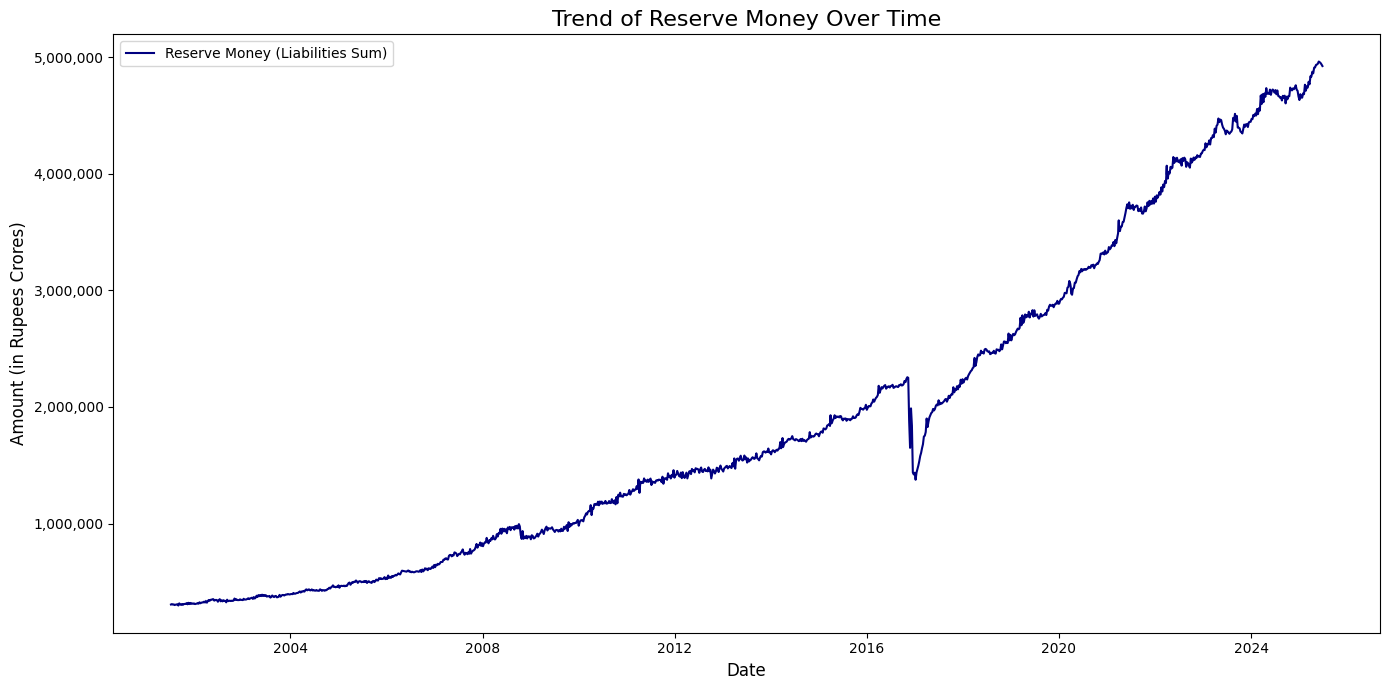


Real Meaning of the Trend Plot This chart shows the overall growth of the monetary base. The steady upward trend reflects
long-term economic expansion and inflation. A steeper slope indicates faster money supply growth, which could be due to an expansionary central bank policy, large foreign inflows,
or significant government borrowing from the RBI.



In [39]:
#  Trend Analysis: Plot Reserve Money over time
reserve_money_col = 'Liabilities_Sum'
plt.figure(figsize=(14, 7))
plt.plot(df.index, df[reserve_money_col], label='Reserve Money (Liabilities Sum)', color='navy')
plt.title('Trend of Reserve Money Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount (in Rupees Crores)', fontsize=12)
# Format Y-axis to show numbers with commas
formatter = mticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.tight_layout()
plt.show()

print("""
Real Meaning of the Trend Plot This chart shows the overall growth of the monetary base. The steady upward trend reflects
long-term economic expansion and inflation. A steeper slope indicates faster money supply growth, which could be due to an expansionary central bank policy, large foreign inflows,
or significant government borrowing from the RBI.
""")

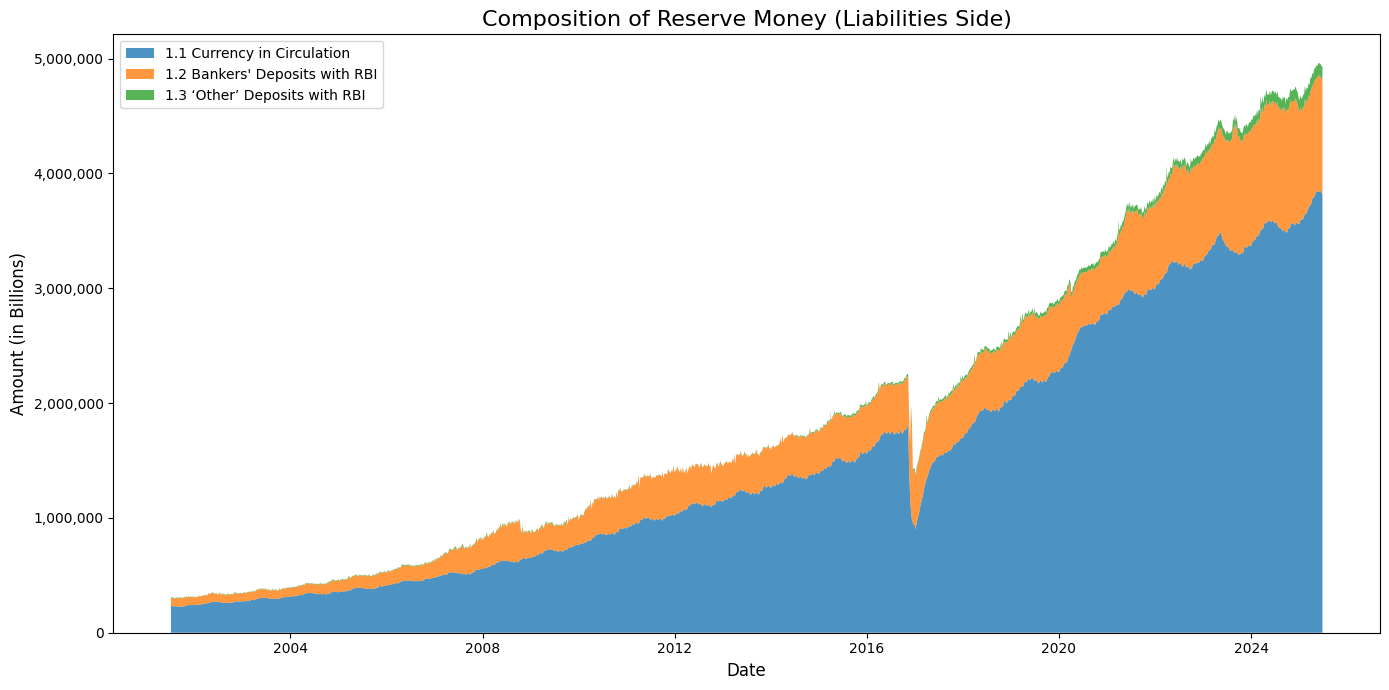


Real Meaning of the Liabilities Composition Plot:
This chart breaks down what Reserve Money is made of.
- 'Currency in Circulation': The dominant component, representing the public's demand for cash.Spikes can indicate festive seasons or a "dash for cash" during uncertain times.
- 'Bankers' Deposits with RBI': Represents bank reserves (CRR). Changes here reflectthe RBI's liquidity management and reserve requirement policies.



In [40]:
# Composition Analysis: Stacked Area Charts
# Chart for the Liabilities Side (Components of Reserve Money)
liability_cols = ['1.1 Currency in Circulation', '1.2 Bankers\' Deposits with RBI', '1.3 ‘Other’ Deposits with RBI']
plt.figure(figsize=(14, 7))
plt.stackplot(df.index, df[liability_cols].T, labels=liability_cols, alpha=0.8)
plt.title('Composition of Reserve Money (Liabilities Side)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount (in Billions)', fontsize=12)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print("""
Real Meaning of the Liabilities Composition Plot:
This chart breaks down what Reserve Money is made of.
- 'Currency in Circulation': The dominant component, representing the public's demand for cash.Spikes can indicate festive seasons or a "dash for cash" during uncertain times.
- 'Bankers' Deposits with RBI': Represents bank reserves (CRR). Changes here reflectthe RBI's liquidity management and reserve requirement policies.
""")

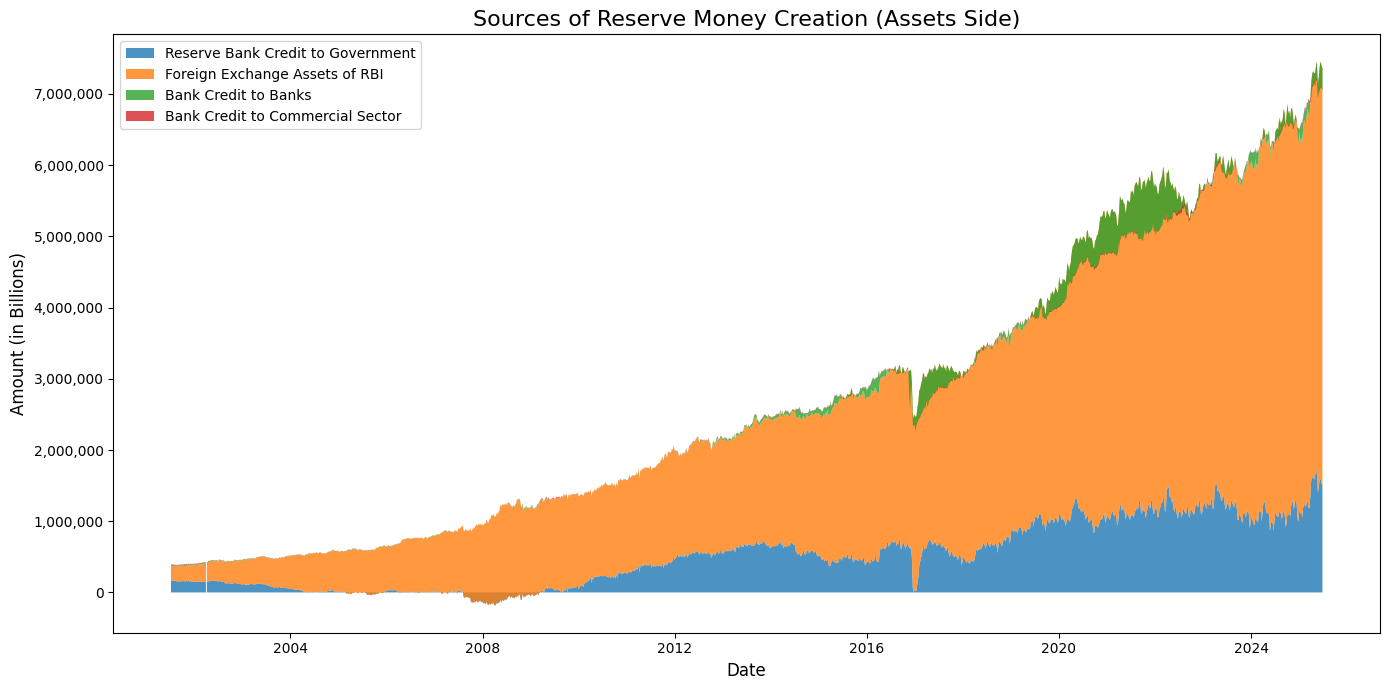


Real Meaning of the Sources Composition Plot:
This is one of the most important charts. It shows WHY the money supply is changing.
- 'Net Foreign Exchange Assets': Growth here means money is being created because the RBI isbuying foreign currency (e.g., from strong exports or foreign investment). This links
  monetary policy to the external sector.
- 'Net RBI Credit to Government': Growth here means the RBI is lending to the government,effectively printing money to finance the fiscal deficit. A rapidly growing share for this
  component can be a red flag for future inflation.
- 'Credit to Banks': This is usually small and volatile, reflecting short-term liquidityprovided by the RBI to banks.



In [41]:
# Chart for the Sources Side (How Reserve Money is Created)
#We only stack the positive asset components for a clear visual representation of their contribution.
#The 'Net Non-Monetary Liabilities' is an accounting adjustment and is not typically stacked."'
source_cols = [
    '2.1 Net Reserve Bank Credit to Government',
    '2.4 Net Foreign Exchange Assets of RBI',
    '2.2 Reserve Bank Credit to Banks',
    '2.3 Reserve Bank Credit to Commercial Sector'
]

plt.figure(figsize=(14, 7))
plt.stackplot(df.index, df[source_cols].T, labels=[col.split(' ', 2)[-1] for col in source_cols], alpha=0.8) # Using shorter labels
plt.title('Sources of Reserve Money Creation (Assets Side)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount (in Billions)', fontsize=12)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print("""
Real Meaning of the Sources Composition Plot:
This is one of the most important charts. It shows WHY the money supply is changing.
- 'Net Foreign Exchange Assets': Growth here means money is being created because the RBI isbuying foreign currency (e.g., from strong exports or foreign investment). This links
  monetary policy to the external sector.
- 'Net RBI Credit to Government': Growth here means the RBI is lending to the government,effectively printing money to finance the fiscal deficit. A rapidly growing share for this
  component can be a red flag for future inflation.
- 'Credit to Banks': This is usually small and volatile, reflecting short-term liquidityprovided by the RBI to banks.
""")



---



### Phase 2: Deeper Economic Analysis

3.  **Growth Rate Analysis:**
    *   **How:** Calculate the Year-on-Year (YoY) percentage change for `Reserve Money` and its key components (CiC, NFA, Credit to Govt). Plotting these growth rates is more insightful than plotting the absolute levels.
    *   **Real Meaning:**
        *   **High YoY growth in Reserve Money:** Suggests an expansionary monetary stance or strong economic momentum. Could lead to future inflation if it outpaces real economic growth.
        *   **High YoY growth in CiC:** Indicates strong consumer demand, a large informal economy, or festive season spending.
        *   **High YoY growth in Credit to Govt:** Signals that the government's borrowing from the RBI is a major driver of money creation, which can be a red flag for fiscal discipline.

4.  **Ratio Analysis:**
    *   **How:** Calculate and plot important ratios over time.
        *   **Ratio 1: `Currency in Circulation / Reserve Money`:**
            *   **Real Meaning:** This shows the public's preference for holding cash versus keeping money in banks. A sudden spike (like during a banking crisis) shows a loss of faith in the banking system. A long-term decline suggests increasing financial formalization and digital payments. *You can clearly see the impact of India's 2016 Demonetisation on this ratio.*
        *   **Ratio 2: `Net RBI Credit to Government / Reserve Money`:**
            *   **Real Meaning:** This shows the proportion of reserve money created due to funding the government. A rising ratio is a strong indicator of fiscal dominance over monetary policy.
        *   **Ratio 3: `Net Foreign Assets / Reserve Money`:**
            *   **Real Meaning:** Shows the proportion of reserve money backed by foreign assets. A high ratio suggests the country's money supply is heavily influenced by its balance of payments (exports, imports, capital flows).

5.  **Seasonal Decomposition:**
    *   **How:** Decompose the time series of `Reserve Money` and especially `Currency in Circulation` into Trend, Seasonality, and Remainder.
    *   **Real Meaning:** This will mathematically isolate recurring patterns.
        *   **Seasonality:** You can precisely identify the impact of festive seasons (like Diwali, when CiC peaks) or the end of the financial year (when government transactions might cause fluctuations). This helps distinguish predictable patterns from genuine new trends.

---

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

/tmp/ipython-input-44-2332902486.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{name} YoY Growth (%)'] = df[col].pct_change(periods=52) * 100


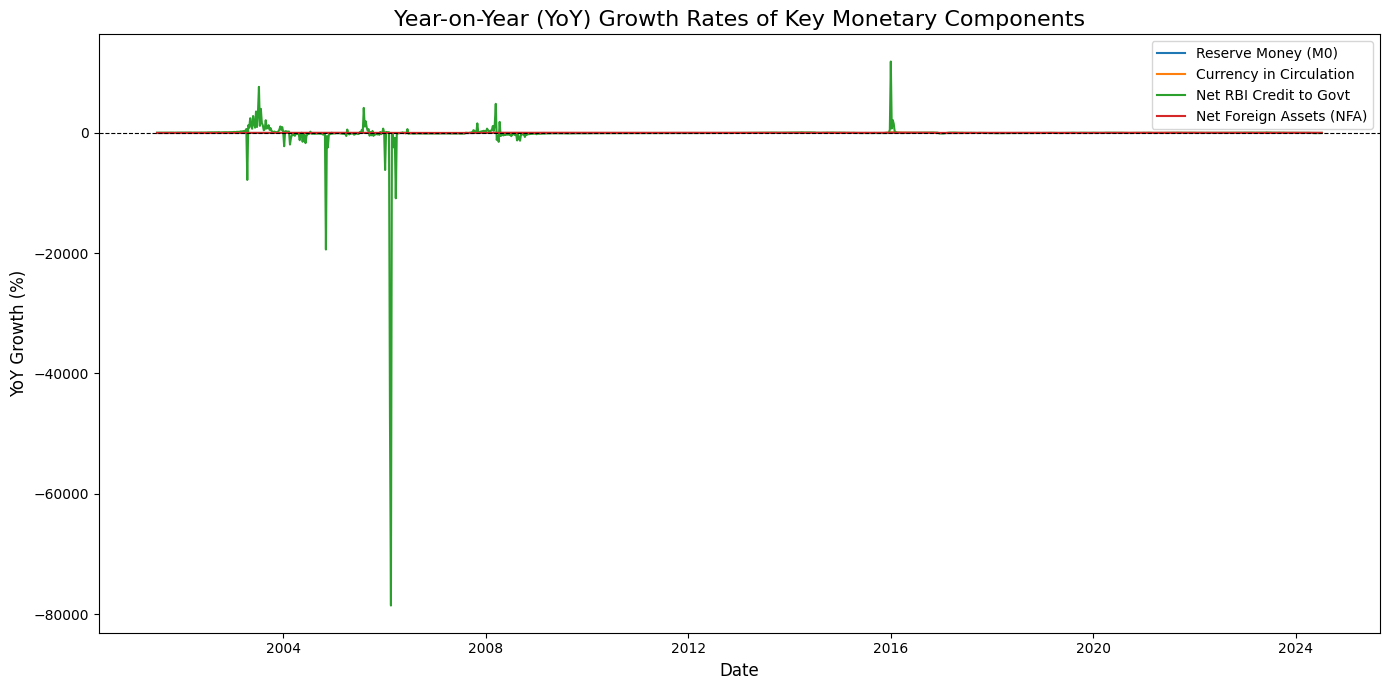


Real Meaning of the YoY Growth Plot:
This plot moves beyond absolute values to show the *rate of change*.
- A high growth rate for 'Reserve Money' suggests an expansionary monetary environment.
- Comparing the lines shows which component is driving the overall growth. For instance, if 'Net RBI
  Credit to Govt' growth is high while 'NFA' growth is low, it signals that domestic fiscal needs,
  not external factors, are the primary engine of money creation. This has important implications
  for inflation and fiscal discipline.



In [44]:
# Growth Rate Analysis

# Define key columns for YoY growth analysis
yoy_growth_cols = {
    'Reserve Money (M0)': reserve_money_col,
    'Currency in Circulation': '1.1 Currency in Circulation',
    'Net RBI Credit to Govt': '2.1 Net Reserve Bank Credit to Government',
    'Net Foreign Assets (NFA)': '2.4 Net Foreign Exchange Assets of RBI'
}

# Calculate YoY growth (percentage change from 52 weeks ago)
for name, col in yoy_growth_cols.items():
    df[f'{name} YoY Growth (%)'] = df[col].pct_change(periods=52) * 100

# Plot the YoY growth rates
plt.figure(figsize=(14, 7))
for name in yoy_growth_cols.keys():
    plt.plot(df.index, df[f'{name} YoY Growth (%)'], label=name)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8) # Add a zero line for reference
plt.title('Year-on-Year (YoY) Growth Rates of Key Monetary Components', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('YoY Growth (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

print("""
Real Meaning of the YoY Growth Plot:
This plot moves beyond absolute values to show the *rate of change*.
- A high growth rate for 'Reserve Money' suggests an expansionary monetary environment.
- Comparing the lines shows which component is driving the overall growth. For instance, if 'Net RBI
  Credit to Govt' growth is high while 'NFA' growth is low, it signals that domestic fiscal needs,
  not external factors, are the primary engine of money creation. This has important implications
  for inflation and fiscal discipline.
""")

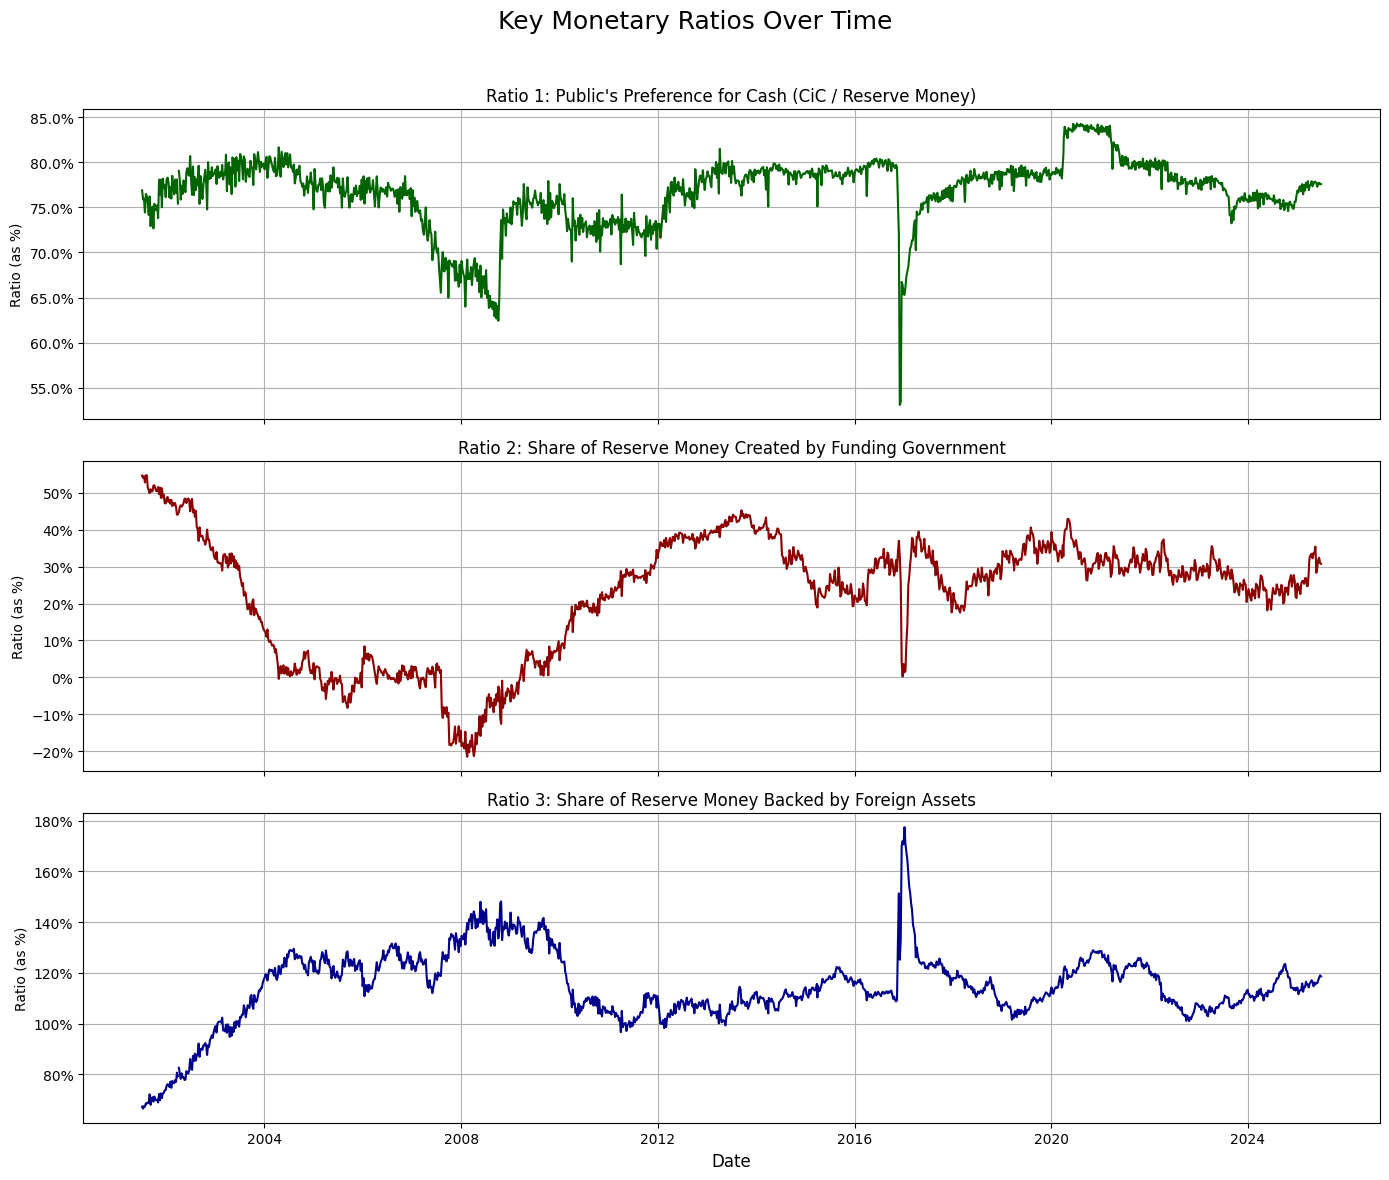


Real Meaning of the Ratio Plots:
- Plot 1 (Cash Preference): Shows the public's desire to hold physical cash. A long-term decline
  suggests a shift towards digital payments and financial formalization. A sudden spike can
  signal a loss of confidence in the banking system.
- Plot 2 (Govt Funding): Measures the extent of 'monetizing the deficit'. A rising trend is a
  classic indicator of fiscal dominance, where monetary policy is heavily influenced by the
  government's financing needs.
- Plot 3 (Foreign Asset Backing): Shows how much of the domestic money supply is 'backed' by
  foreign currency reserves. A high ratio indicates that the balance of payments (trade and
  capital flows) is a major determinant of the country's monetary conditions.



In [51]:
#  Ratio Analysis


# Calculate the key ratios
df['CiC to RM Ratio'] = df['1.1 Currency in Circulation'] / df[reserve_money_col]
df['Credit to Govt to RM Ratio'] = df['2.1 Net Reserve Bank Credit to Government'] / df[reserve_money_col]
df['NFA to RM Ratio'] = df['2.4 Net Foreign Exchange Assets of RBI'] / df[reserve_money_col]

# Plot the ratios in separate subplots for clarity
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle('Key Monetary Ratios Over Time', fontsize=18)

# Ratio 1: Currency in Circulation / Reserve Money
axes[0].plot(df.index, df['CiC to RM Ratio'], color='darkgreen')
axes[0].set_title("Ratio 1: Public's Preference for Cash (CiC / Reserve Money)")
axes[0].set_ylabel("Ratio (as %)")
axes[0].yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
axes[0].grid(True)

# Ratio 2: Net RBI Credit to Government / Reserve Money
axes[1].plot(df.index, df['Credit to Govt to RM Ratio'], color='darkred')
axes[1].set_title("Ratio 2: Share of Reserve Money Created by Funding Government")
axes[1].set_ylabel("Ratio (as %)")
axes[1].yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
axes[1].grid(True)

# Ratio 3: Net Foreign Assets / Reserve Money
axes[2].plot(df.index, df['NFA to RM Ratio'], color='darkblue')
axes[2].set_title("Ratio 3: Share of Reserve Money Backed by Foreign Assets")
axes[2].set_ylabel("Ratio (as %)")
axes[2].yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
axes[2].grid(True)

plt.xlabel('Date', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()

print("""
Real Meaning of the Ratio Plots:
- Plot 1 (Cash Preference): Shows the public's desire to hold physical cash. A long-term decline
  suggests a shift towards digital payments and financial formalization. A sudden spike can
  signal a loss of confidence in the banking system.
- Plot 2 (Govt Funding): Measures the extent of 'monetizing the deficit'. A rising trend is a
  classic indicator of fiscal dominance, where monetary policy is heavily influenced by the
  government's financing needs.
- Plot 3 (Foreign Asset Backing): Shows how much of the domestic money supply is 'backed' by
  foreign currency reserves. A high ratio indicates that the balance of payments (trade and
  capital flows) is a major determinant of the country's monetary conditions.
""")

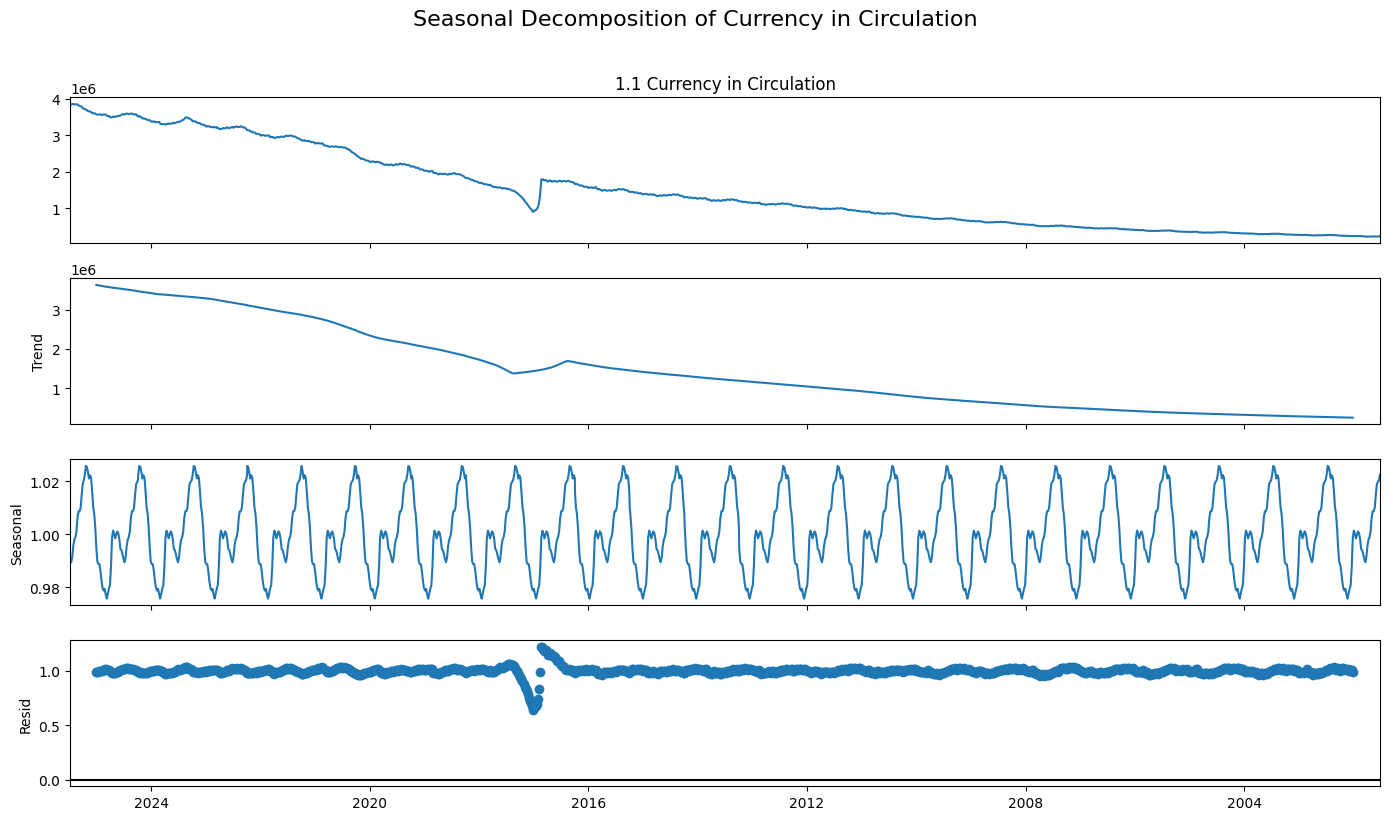


Real Meaning of the Seasonal Decomposition Plot:
This powerful technique breaks down the time series into its core components:
- Observed: The original data.
- Trend: The long-term underlying direction of the data, with noise and seasonality removed.
- Seasonal: A repeating, cyclical pattern within a year. For CiC, you can precisely identify
  the magnitude of demand for cash during festive seasons (like Diwali in India) or holidays.
  This is the predictable part of the fluctuation.
- Resid (Residual): What's left over after removing the trend and seasonal components. This represents
  the irregular, unpredictable noise or one-off events (e.g., policy shocks, unexpected crises).
  Analyzing the residuals is key to finding anomalies.



In [52]:
# Seasonal Decomposition ---
# Decompose 'Currency in Circulation' as it often has strong seasonality
# We use a multiplicative model because the seasonal fluctuations often grow with the trend.
# The period is 52 for weekly data with an annual cycle.
decomposition_cic = seasonal_decompose(
    df['1.1 Currency in Circulation'].dropna(),
    model='multiplicative',
    period=52
)

# Plot the decomposition
fig = decomposition_cic.plot()
fig.set_size_inches(14, 8)
plt.suptitle('Seasonal Decomposition of Currency in Circulation', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

print("""
Real Meaning of the Seasonal Decomposition Plot:
This powerful technique breaks down the time series into its core components:
- Observed: The original data.
- Trend: The long-term underlying direction of the data, with noise and seasonality removed.
- Seasonal: A repeating, cyclical pattern within a year. For CiC, you can precisely identify
  the magnitude of demand for cash during festive seasons (like Diwali in India) or holidays.
  This is the predictable part of the fluctuation.
- Resid (Residual): What's left over after removing the trend and seasonal components. This represents
  the irregular, unpredictable noise or one-off events (e.g., policy shocks, unexpected crises).
  Analyzing the residuals is key to finding anomalies.
""")


### Phase 3: Advanced & Predictive Analysis

6.  **Correlation and Causality:**
    *   **Correlation Matrix:** Calculate the correlation between the YoY growth rates of all variables.
        *   **Real Meaning:** Is the growth in Reserve Money more correlated with NFA growth or Credit to Government growth? This quantifies the relationship you observed visually in the stacked charts.
    *   **Granger Causality Test:** This is a statistical test to see if one time series is useful in forecasting another.
        *   **Example Questions:** Does a change in `Net RBI Credit to Government` *Granger-cause* a change in `Reserve Money`? Does a change in the `Repo Rate` (you'd need to add this data) *Granger-cause* a change in `RBI Credit to Banks`? This helps establish a predictive (though not necessarily causal) link between policy actions and their outcomes.

7.  **Event Study Analysis:**
    *   **How:** Identify major economic or policy events on your timeline.
        *   **Events:** The 2008 Global Financial Crisis, India's 2016 Demonetisation, Repo rate hikes/cuts, the COVID-19 pandemic (and associated government stimulus).
    *   **Analysis:** Analyze the behavior of the key variables in the weeks *before* and *after* these events.
    *   **Real Meaning:** This provides powerful, real-world evidence of how the monetary system responds to shocks. For example, you would expect to see `RBI Credit to Banks` spike during a liquidity crisis, and `Net RBI Credit to Government` to rise sharply after a major stimulus package is announced.

8.  **Vector Autoregression (VAR) Modeling:**
    *   **What it is:** A model for multivariate time series data that captures the linear interdependencies among multiple variables.
    *   **What you can do:**
        *   **Impulse Response Functions (IRF):** Simulate a "shock" to one variable and see how others respond over time. **Real Meaning:** "If there is a sudden $1 billion increase in NFA (e.g., from a large FDI deal), how will Reserve Money, CiC, and Bankers' Deposits react over the next 12 weeks?"
        *   **Forecast Error Variance Decomposition (FEVD):** Decompose the forecast error variance of a variable into the contributions from shocks to other variables. **Real Meaning:** "Over the next year, what percentage of the changes in Reserve Money can be attributed to shocks in government borrowing versus shocks in foreign inflows?" This tells you which factor is the most important driver of uncertainty and change.

In [56]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

rm_col = 'Reserve Money (M0)'
cic_col = '1.1 Currency in Circulation'
govt_credit_col = '2.1 Net Reserve Bank Credit to Government'
banks_credit_col = '2.2 Reserve Bank Credit to Banks'
nfa_col = '2.4 Net Foreign Exchange Assets of RBI'

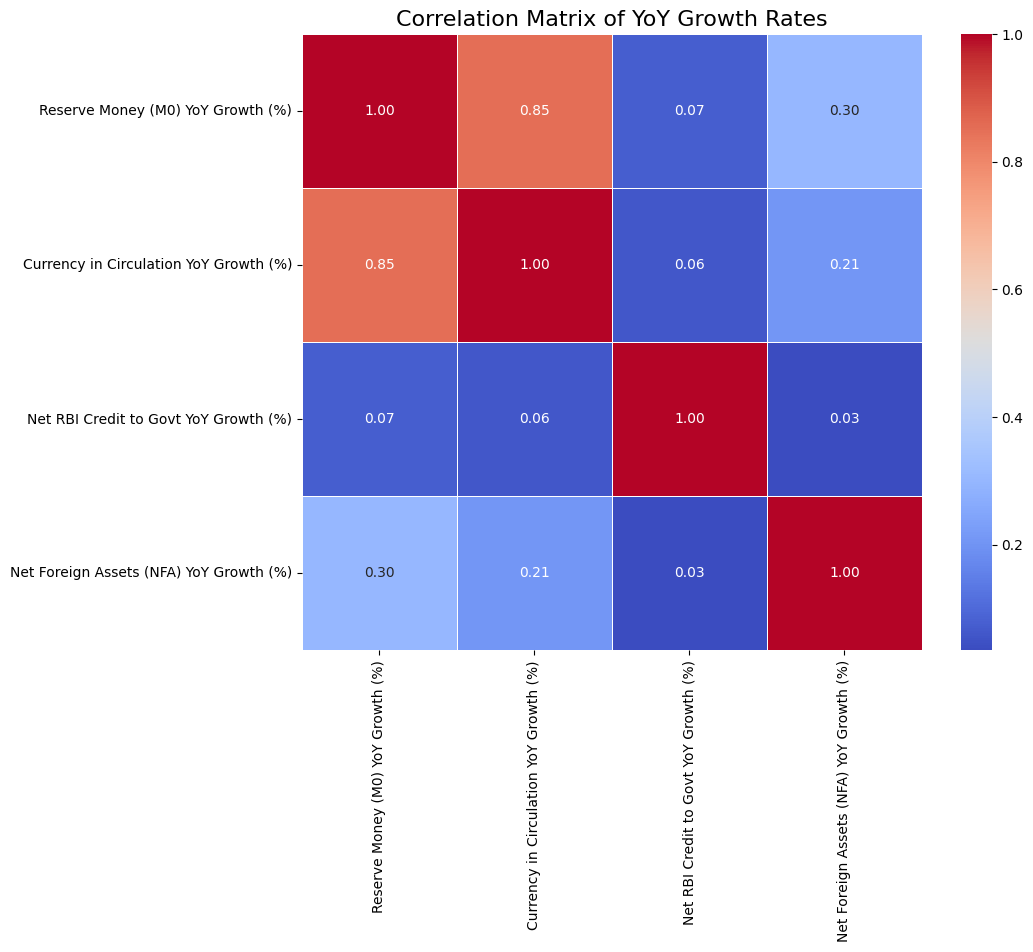


Real Meaning of the Correlation Matrix:
This heatmap quantifies the linear relationship between the growth rates of key variables.
- A high positive value (e.g., > 0.7, red) between 'Net RBI Credit to Govt YoY Growth' and
  'Reserve Money (M0) YoY Growth' would strongly suggest that when government borrowing
  from the RBI accelerates, so does the growth of the monetary base.
- It helps validate the visual insights from your earlier stacked charts with a single number.



In [57]:
# YoY Growth column names
rm_yoy_col = 'Reserve Money (M0) YoY Growth (%)'
cic_yoy_col = 'Currency in Circulation YoY Growth (%)'
govt_credit_yoy_col = 'Net RBI Credit to Govt YoY Growth (%)'
nfa_yoy_col = 'Net Foreign Assets (NFA) YoY Growth (%)'


# Correlation and Causality
# Correlation Matrix of YoY Growth Rates
growth_cols = [rm_yoy_col, cic_yoy_col, govt_credit_yoy_col, nfa_yoy_col]
corr_matrix = df[growth_cols].corr()

# Visualize the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of YoY Growth Rates', fontsize=16)
plt.show()

print("""
Real Meaning of the Correlation Matrix:
This heatmap quantifies the linear relationship between the growth rates of key variables.
- A high positive value (e.g., > 0.7, red) between 'Net RBI Credit to Govt YoY Growth' and
  'Reserve Money (M0) YoY Growth' would strongly suggest that when government borrowing
  from the RBI accelerates, so does the growth of the monetary base.
- It helps validate the visual insights from your earlier stacked charts with a single number.
""")

In [58]:
#  Granger Causality Test
print("Hypothesis: Does Government Credit Growth Granger-Cause Reserve Money Growth?")
# The second column is tested to see if it Granger-causes the first.The test requires a DataFrame with no missing values
causality_data = df[[rm_yoy_col, govt_credit_yoy_col]].dropna()
# We test with a lag of 4 weeks (approx. 1 month). You can test other lags.
max_lags = 4
gc_results = grangercausalitytests(causality_data, maxlag=max_lags, verbose=True)

print(f"""
Real Meaning of Granger Causality Results:
The test checks if past values of one variable (Govt Credit Growth) have statistically
significant power to predict the future values of another (Reserve Money Growth).

How to read the table above:
- For each lag, look at the p-value for the F-test (the final column, 'pr>f').
- If p < 0.05: We reject the null hypothesis. This means we have statistical evidence
  that past changes in government credit growth are useful in predicting future
  changes in reserve money growth.
""")

Hypothesis: Does Government Credit Growth Granger-Cause Reserve Money Growth?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0028  , p=0.9577  , df_denom=1208, df_num=1
ssr based chi2 test:   chi2=0.0028  , p=0.9576  , df=1
likelihood ratio test: chi2=0.0028  , p=0.9576  , df=1
parameter F test:         F=0.0028  , p=0.9577  , df_denom=1208, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9055  , p=0.4046  , df_denom=1205, df_num=2
ssr based chi2 test:   chi2=1.8185  , p=0.4028  , df=2
likelihood ratio test: chi2=1.8172  , p=0.4031  , df=2
parameter F test:         F=0.9055  , p=0.4046  , df_denom=1205, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8242  , p=0.4805  , df_denom=1202, df_num=3
ssr based chi2 test:   chi2=2.4870  , p=0.4776  , df=3
likelihood ratio test: chi2=2.4844  , p=0.4781  , df=3
parameter F test:         F=0.8242  , p=0.4805  , df_denom=1202, df_num=3

Granger C

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


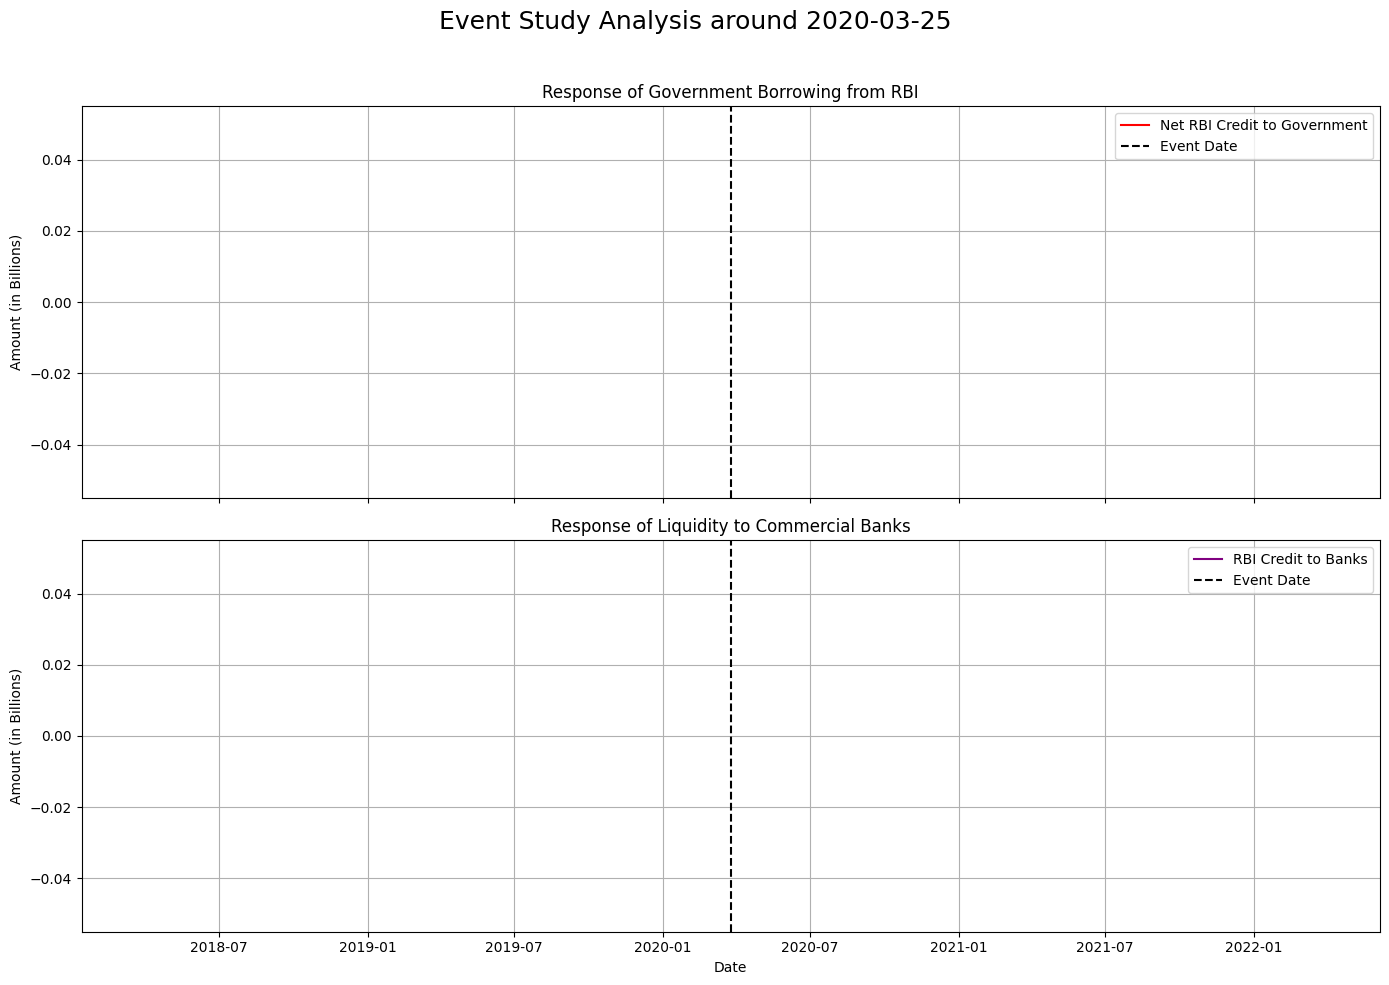


Real Meaning of the Event Study Plot:
This analysis isolates the impact of a specific, known event. A crisis like COVID-19 would show:
- A steep climb in 'Net RBI Credit to Government' as the central bank funds the government's fiscal stimulus.
- A sharp, temporary spike in 'RBI Credit to Banks' as the central bank injects emergency liquidity
  into a stressed financial system to prevent a credit crunch.



In [60]:



# Event Study Analysis
# event_date_str = '2016-11-08'  #Demonetisation
# event_date_str = '2020-03-25' # First COVID-19 Lockdown
# event_date_str = '2008-09-15' # Lehman Brothers collapse

event_date_str = '2020-03-25'


event_date = pd.to_datetime(event_date_str)
window_before = 48 # 12 weeks before
window_after = 48  # 24 weeks after

start_date = event_date - pd.DateOffset(weeks=window_before)
end_date = event_date + pd.DateOffset(weeks=window_after)
event_subset = df.loc[start_date:end_date]

# Plot the behavior of key variables around the event
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle(f'Event Study Analysis around {event_date_str}', fontsize=18)

# Plot 1: Net RBI Credit to Government
axes[0].plot(event_subset.index, event_subset[govt_credit_col], color='red', label='Net RBI Credit to Government')
axes[0].axvline(x=event_date, color='black', linestyle='--', label=f'Event Date')
axes[0].set_title('Response of Government Borrowing from RBI')
axes[0].set_ylabel('Amount (in Billions)')
axes[0].legend()
axes[0].grid(True)

# Plot 2: RBI Credit to Banks
axes[1].plot(event_subset.index, event_subset[banks_credit_col], color='purple', label='RBI Credit to Banks')
axes[1].axvline(x=event_date, color='black', linestyle='--', label=f'Event Date')
axes[1].set_title('Response of Liquidity to Commercial Banks')
axes[1].set_ylabel('Amount (in Billions)')
axes[1].legend()
axes[1].grid(True)

plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("""
Real Meaning of the Event Study Plot:
This analysis isolates the impact of a specific, known event. A crisis like COVID-19 would show:
- A steep climb in 'Net RBI Credit to Government' as the central bank funds the government's fiscal stimulus.
- A sharp, temporary spike in 'RBI Credit to Banks' as the central bank injects emergency liquidity
  into a stressed financial system to prevent a credit crunch.
""")




In [61]:
# Vector Autoregression (VAR) Modeling

# Prepare data: Use stationary YoY growth rates and drop any NaNs
var_cols = [rm_yoy_col, govt_credit_yoy_col, nfa_yoy_col]
var_data = df[var_cols].dropna()

# Fit the VAR model. Note: Choosing the optimal lag order (here, 4) is a key
# step, often done using information criteria like AIC or BIC.
model = VAR(var_data)
results = model.fit(4)
print("\nVAR Model Results Summary:")
print(results.summary())


VAR Model Results Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Jul, 2025
Time:                     13:11:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    17.8206
Nobs:                     1208.00    HQIC:                   17.7180
Log likelihood:          -15767.5    FPE:                4.65515e+07
AIC:                      17.6561    Det(Omega_mle):     4.50804e+07
--------------------------------------------------------------------
Results for equation Reserve Money (M0) YoY Growth (%)
                                                coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------------
const                                             -0.235225         0.134885           -1.744           0.08

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



--- Impulse Response Functions (IRF) ---


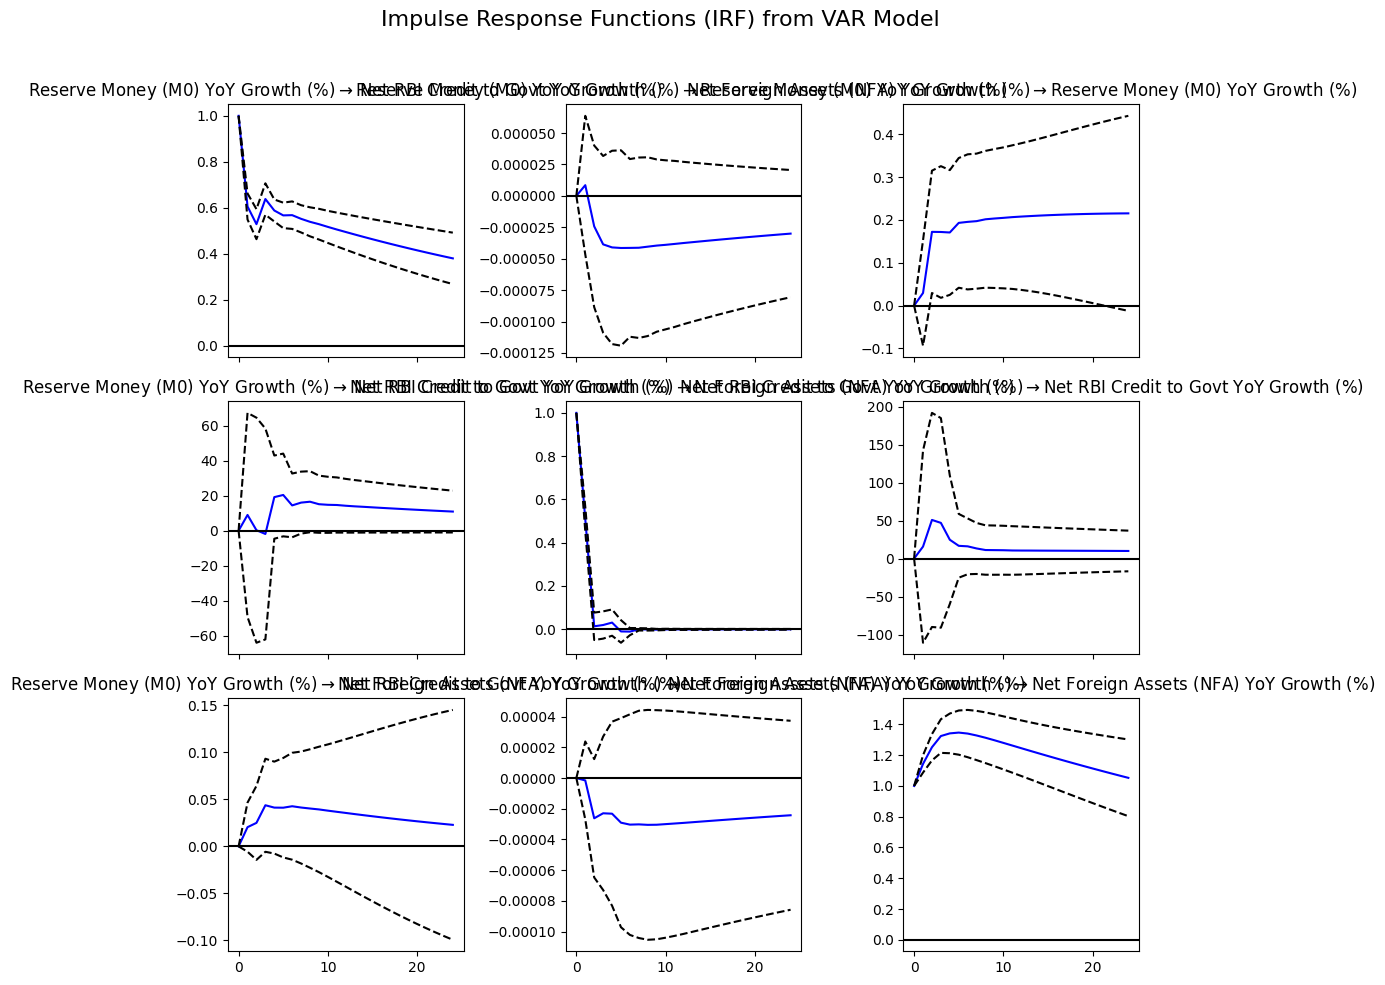


Real Meaning of the IRF Plot:
Each small plot shows how a variable in the column title responds over time (x-axis) to a
one-standard-deviation shock in a variable from the row title.
- Example: Look at the plot in the first row, second column (Impulse: Net RBI Credit to Govt..., Response: Reserve Money...).
  This shows how a surprise increase in government credit growth affects reserve money growth.
  A positive response demonstrates how fiscal actions transmit to the money supply.



In [63]:
# Impulse Response Functions (IRF)
print("\n--- Impulse Response Functions (IRF) ---")
# IRF traces the effect of a one-time shock in one variable on others in the system.
irf = results.irf(periods=24) # Analyze the response over 24 weeks (approx. 6 months)
fig = irf.plot(orth=False)
fig.suptitle('Impulse Response Functions (IRF) from VAR Model', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("""
Real Meaning of the IRF Plot:
Each small plot shows how a variable in the column title responds over time (x-axis) to a
one-standard-deviation shock in a variable from the row title.
- Example: Look at the plot in the first row, second column (Impulse: Net RBI Credit to Govt..., Response: Reserve Money...).
  This shows how a surprise increase in government credit growth affects reserve money growth.
  A positive response demonstrates how fiscal actions transmit to the money supply.
""")